In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
filename = "Advertising.csv"
df_adv = pd.read_csv(filename)

In [4]:
df_adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
x_true = df_adv.TV.iloc[5:13]
y_true = df_adv.Sales.iloc[5:13]

idx = np.argsort(x_true).values

x_true = x_true.iloc[idx].values

y_true = y_true.iloc[idx].values

In [6]:
def find_nearest(array, value):

    idx = pd.Series(np.abs(array - value)).idxmin()

    return idx, array[idx]

In [7]:
x = np.linspace(np.min(x_true), np.max(x_true))

y = np.zeros((len(x)))

In [8]:
for i, xi in enumerate(x):

    y[i] = y_true[find_nearest(x_true, xi)[0]]

Text(0, 0.5, 'Sales in $1000')

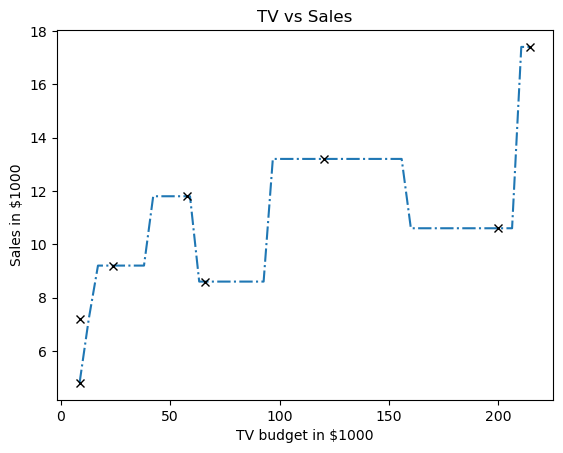

In [9]:
plt.plot(x, y, "-.")
plt.plot(x_true, y_true, "kx")
plt.title("TV vs Sales")
plt.xlabel("TV budget in $1000")
plt.ylabel("Sales in $1000")

In [10]:
data_filename = "Advertising.csv"
df = pd.read_csv(data_filename)

x = df[["TV"]]
y = df[["Sales"]]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.6, random_state=42
)

In [12]:
k_value_min = 1

k_value_max = 70

k_list = np.linspace(k_value_min, k_value_max, 70)

C:\Users\cowbo\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\cowbo\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\cowbo\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


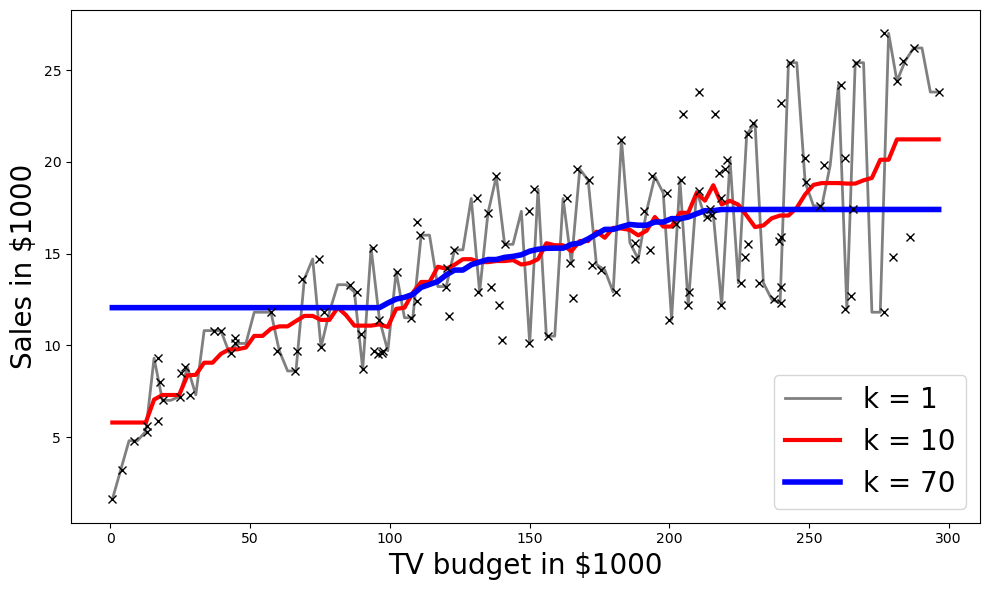

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

j = 0

for k_value in k_list:

    model = KNeighborsRegressor(n_neighbors=int(k_value))
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    colors = ["grey", "r", "b"]
    if k_value in [1, 10, 70]:
        xvals = np.linspace(x.min(), x.max(), 100)
        ypreds = model.predict(xvals)
        ax.plot(
            xvals,
            ypreds,
            "-",
            label=f"k = {int(k_value)}",
            linewidth=j + 2,
            color=colors[j],
        )
        j += 1

ax.legend(loc="lower right", fontsize=20)
ax.plot(x_train, y_train, "x", label="train", color="k")
ax.set_xlabel("TV budget in $1000", fontsize=20)
ax.set_ylabel("Sales in $1000", fontsize=20)
plt.tight_layout()